# Trabajo Final IA 2025 - Lisandro Duhalde

## Descripción del proyecto

En este notebook se aborda un problema de clasificación de imágenes supervisada, donde el objetivo es clasificar imágenes del dataset CIFAR-10 en una de sus 10 categorías. El trabajo incluye:

Análisis exploratorio de datos (EDA): Para comprender la estructura y características del dataset.
Preprocesamiento de datos: Normalización de píxeles y codificación One-Hot de las etiquetas.
Entrenamiento de distintos modelos de red neuronal: Incluyendo redes completamente conectadas (FCN), Redes Neuronales Convolucionales (CNN) y modelos basados en transferencia de aprendizaje con MobileNetV2.
Evaluación de su desempeño: Utilizando métricas como la accuracy y la loss, así como matrices de confusión.
El objetivo principal es comparar la capacidad de estos modelos para aprender a clasificar las imágenes de CIFAR-10, analizando los beneficios de arquitecturas más complejas como las CNN y la transferencia de aprendizaje.


## Modelos utilizados



*   Redes Completamente Conectadas (FCN) con activación Sigmoid
*   Redes Completamente Conectadas (FCN) con activación ReLU
*   Red Neuronal Convolucional (CNN)
*   MobileNetV2 (Transferencia de Aprendizaje - Fine-tuning parcial)
*   MobileNetV2 (Transferencia de Aprendizaje - Solo capas añadidas)








In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Cargo el dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Cantidad de imagenes de entrenamiento, píxeles(32x32), canales de color(3 = RGB)
print(f"x_train: {x_train.shape}")

# Cantidad de etiquetas de entrenamiento
print(f"y_train: {y_train.shape}")

# Cantidad de imagenes de prueba
print(f"x_test: {x_test.shape}")

# Cantidad de etiquetas de prueba
print(f"y_test: {y_test.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
x_train: (50000, 32, 32, 3)
y_train: (50000, 1)
x_test: (10000, 32, 32, 3)
y_test: (10000, 1)


In [ ]:
import numpy as np

# Normalización de las imágenes
# Convertir los datos a tipo float32 y escalar los píxeles al rango [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print(f"x_train después de normalizar: {x_train.min()} a {x_train.max()}")
print(f"x_test después de normalizar: {x_test.min()} a {x_test.max()}")

x_train después de normalizar: 0.0 a 1.0
x_test después de normalizar: 0.0 a 1.0


In [ ]:
from tensorflow.keras.utils import to_categorical

# Codificación One-Hot de las etiquetas
# CIFAR-10 tiene 10 clases
num_classes = 10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print(f"Ejemplo de etiqueta y_train[0]: {y_train[0]}")

Ejemplo de etiqueta y_train[0]: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Modelo 1 usando sigmoid
modelo_1 = Sequential([
    Flatten(input_shape=(32, 32, 3)), # Aplanamos la imagen a un vector de 3072 valores
    Dense(512, activation='sigmoid'),
    Dense(128, activation='sigmoid'),
    Dense(64, activation='sigmoid'),
    Dense(32, activation='sigmoid'),
    Dense(10, activation='softmax')
])


# Modelo 2 usando relu
modelo_2 = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Entrenamiento modelo 1

In [ ]:
modelo_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento modelo 1

history_modelo1 = modelo_1.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.1434 - loss: 2.2060 - val_accuracy: 0.1861 - val_loss: 2.0656
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.1944 - loss: 2.0502 - val_accuracy: 0.2026 - val_loss: 2.0401
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2039 - loss: 2.0336 - val_accuracy: 0.2108 - val_loss: 2.0506
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2194 - loss: 2.0138 - val_accuracy: 0.2434 - val_loss: 1.9789
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2410 - loss: 1.9809 - val_accuracy: 0.2363 - val_loss: 1.9771
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2793 - loss: 1.9204 - val_accuracy: 0.2927 - val_loss: 1.9097
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2998 - loss: 1.8871 - val_accuracy: 0.2984 - val_loss: 1.8800
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3115 - loss: 1.8543 

Entrenamiento modelo 2

In [ ]:
modelo_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento modelo 2

history_modelo2 = modelo_2.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.2033 - loss: 2.0967 - val_accuracy: 0.3347 - val_loss: 1.8425
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3431 - loss: 1.8095 - val_accuracy: 0.3357 - val_loss: 1.8400
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3793 - loss: 1.7176 - val_accuracy: 0.3953 - val_loss: 1.6995
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4116 - loss: 1.6399 - val_accuracy: 0.4220 - val_loss: 1.6190
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4278 - loss: 1.5896 - val_accuracy: 0.4304 - val_loss: 1.6007
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4481 - loss: 1.5359 - val_accuracy: 0.4364 - val_loss: 1.5903
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4648 - loss: 1.5055 - val_accuracy: 0.4424 - val_loss: 1.5654
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4741 - loss: 1.4634 -

Evaluacion modelo 1

In [ ]:
loss_m1, acc_m1 = modelo_1.evaluate(x_test, y_test, verbose=0)
train_loss_m1, train_acc_m1 = modelo_1.evaluate(x_train, y_train, verbose=0)

print(f"Modelo 1 - Train Accuracy: {train_acc_m1:.4f} | Train Loss: {train_loss_m1:.4f}")
print(f"Modelo 1 - Test Accuracy: {acc_m1:.4f} | Test Loss: {loss_m1:.4f}")

Modelo 1 - Train Accuracy: 0.3313 | Train Loss: 1.8014
Modelo 1 - Test Accuracy: 0.3281 | Test Loss: 1.8107


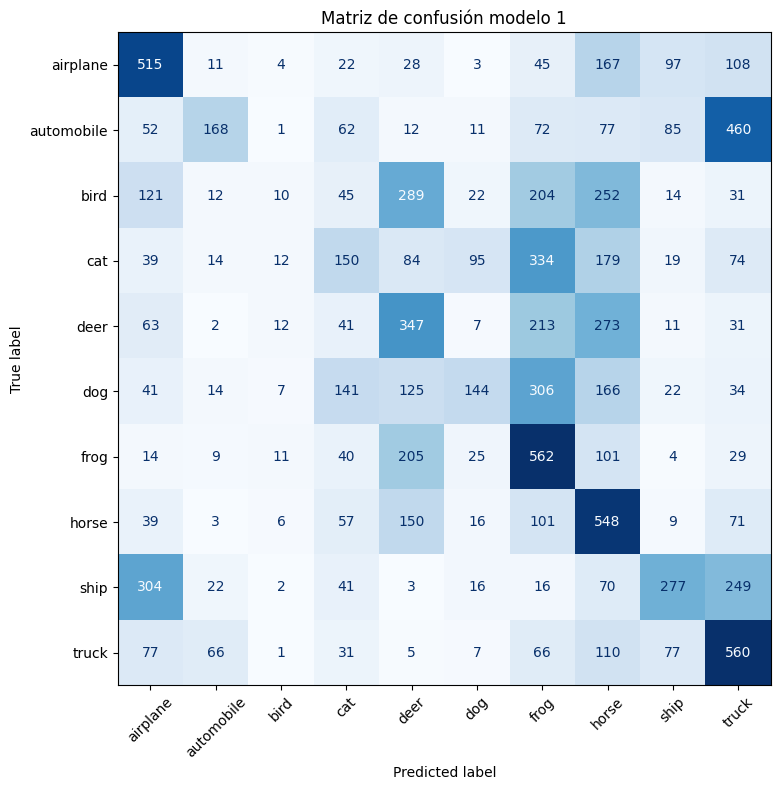

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Definimos los nombres de las clases de CIFAR-10
target_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Predicciones y métricas detalladas
y_prob = modelo_1.predict(x_test, verbose=0)
y_pred = np.argmax(y_prob, axis=1)

# Convertir y_test de one-hot a etiquetas enteras
y_test_labels = np.argmax(y_test, axis=1)

# Matriz de confusión
cm = confusion_matrix(y_test_labels, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap="Blues", xticks_rotation=45, values_format='d', colorbar=False)
plt.title("Matriz de confusión modelo 1")
plt.tight_layout()
plt.show()

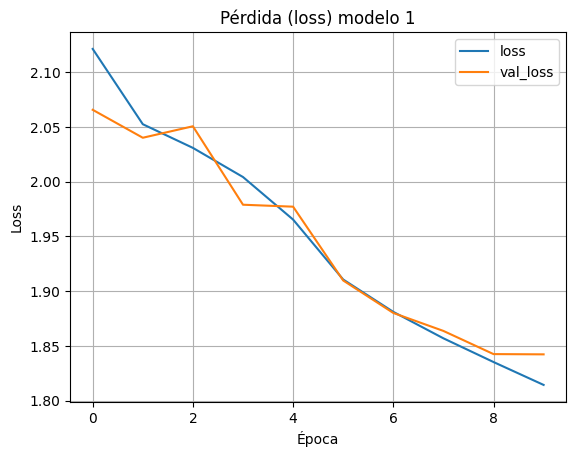

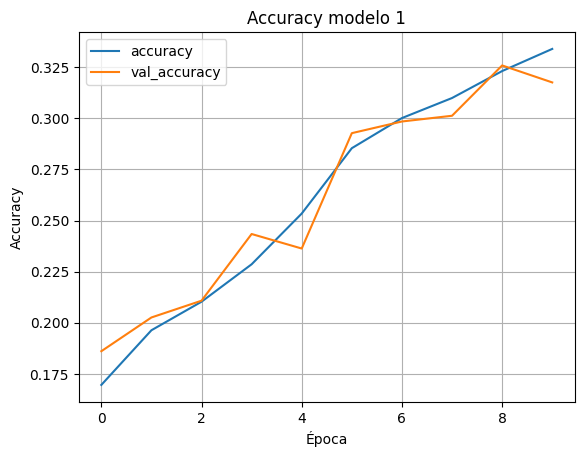

In [ ]:
# Curvas de entrenamiento
import pandas as pd
hist = pd.DataFrame(history_modelo1.history)
ax = hist[['loss','val_loss']].plot(title='Pérdida (loss) modelo 1', grid=True)
ax.set_xlabel('Época'); ax.set_ylabel('Loss'); plt.show()

ax = hist[['accuracy','val_accuracy']].plot(title='Accuracy modelo 1', grid=True)
ax.set_xlabel('Época'); ax.set_ylabel('Accuracy'); plt.show()

Evaluacion modelo 2

In [ ]:
loss_m2, acc_m2 = modelo_2.evaluate(x_test, y_test, verbose=0)
train_loss_m2, train_acc_m2 = modelo_2.evaluate(x_train, y_train, verbose=0)

print(f"Modelo 2 - Train Accuracy: {train_acc_m2:.4f} | Train Loss: {train_loss_m2:.4f}")
print(f"Modelo 2 - Test Accuracy: {acc_m2:.4f} | Test Loss: {loss_m2:.4f}")

Modelo 2 - Train Accuracy: 0.5023 | Train Loss: 1.3934
Modelo 2 - Test Accuracy: 0.4747 | Test Loss: 1.4899


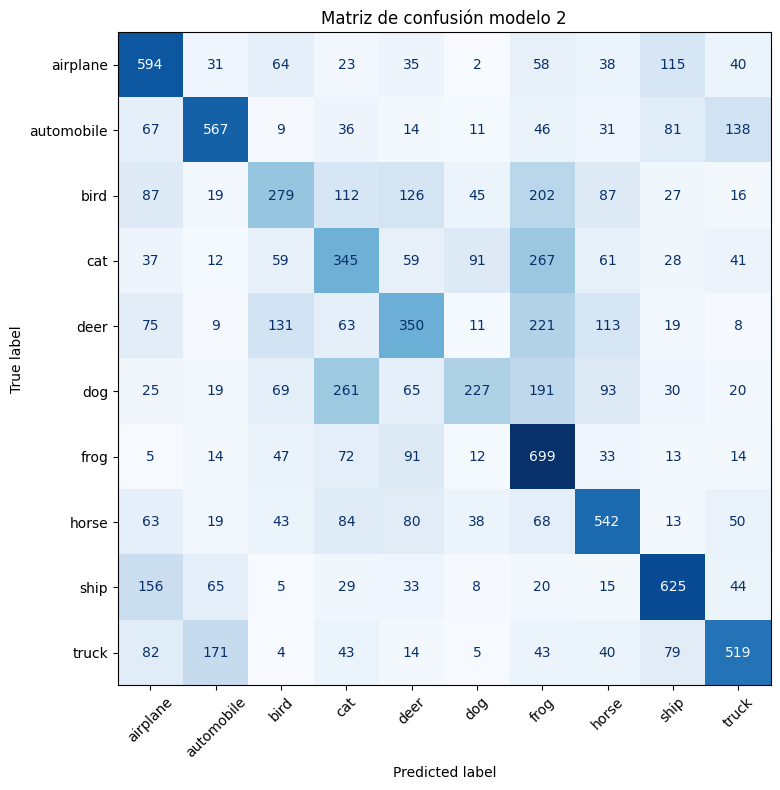

In [ ]:
# Predicciones y métricas detalladas
y_prob = modelo_2.predict(x_test, verbose=0)
y_pred = np.argmax(y_prob, axis=1)

# Convertir y_test de one-hot a etiquetas enteras
y_test_labels = np.argmax(y_test, axis=1)

# Matriz de confusión
cm = confusion_matrix(y_test_labels, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap="Blues", xticks_rotation=45, values_format='d', colorbar=False)
plt.title("Matriz de confusión modelo 2")
plt.tight_layout()
plt.show()

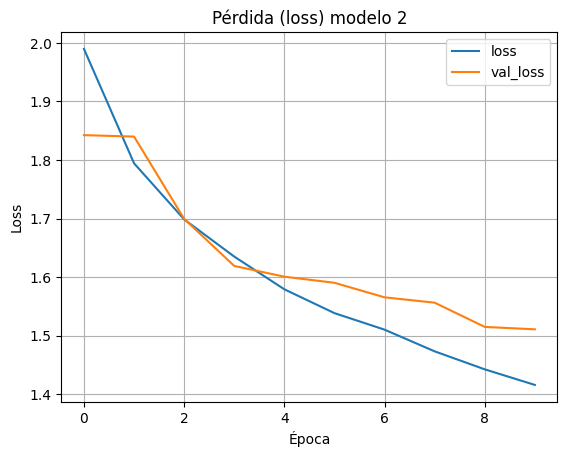

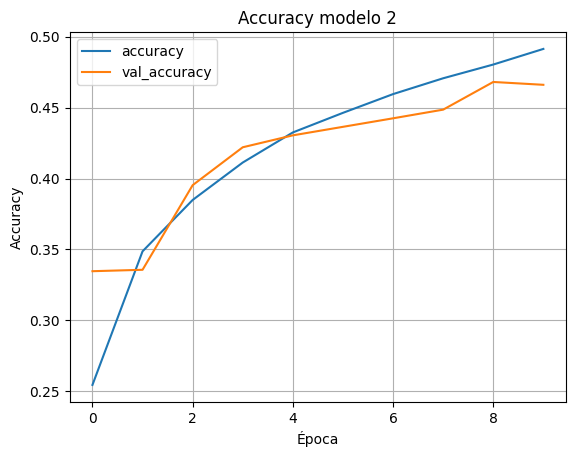

In [ ]:
# Curvas de entrenamiento
import pandas as pd
hist = pd.DataFrame(history_modelo2.history)
ax = hist[['loss','val_loss']].plot(title='Pérdida (loss) modelo 2', grid=True)
ax.set_xlabel('Época'); ax.set_ylabel('Loss'); plt.show()

ax = hist[['accuracy','val_accuracy']].plot(title='Accuracy modelo 2', grid=True)
ax.set_xlabel('Época'); ax.set_ylabel('Accuracy'); plt.show()

Desarrollo modelo 3 con arquitectura CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

modelo_3_CNN = Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Conv2D(32, kernel_size=3, activation="relu"),
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(64, kernel_size=3, activation="relu"),
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax"),
])

modelo_3_CNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

modelo_3_CNN.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Entrenamiento
history_cnn = modelo_3_CNN.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_test, y_test)
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.3911 - loss: 1.6712 - val_accuracy: 0.5989 - val_loss: 1.1394
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.6154 - loss: 1.1080 - val_accuracy: 0.6454 - val_loss: 1.0195
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6697 - loss: 0.9474 - val_accuracy: 0.6727 - val_loss: 0.9431
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7127 - loss: 0.8251 - val_accuracy: 0.6650 - val_loss: 0.9739
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7418 - loss: 0.7421 - val_accuracy: 0.6934 - val_loss: 0.9108
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7673 - loss: 0.6725 - val_accuracy: 0.6924 - val_loss: 0.9167
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7926 - loss: 0.5891 - val_accuracy: 0.6919 - val_loss: 0.9392
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8136 - loss: 0.5363

In [ ]:
loss_m3, acc_m3 = modelo_3_CNN.evaluate(x_test, y_test, verbose=0)
train_loss_m3, train_acc_m3 = modelo_3_CNN.evaluate(x_train, y_train, verbose=0)

print(f"Modelo 3 - Train Accuracy: {train_acc_m3:.4f} | Train Loss: {train_loss_m3:.4f}")
print(f"Modelo 3 - Test Accuracy: {acc_m3:.4f} | Test Loss: {loss_m3:.4f}")

Modelo 3 - Train Accuracy: 0.8783 | Train Loss: 0.3621
Modelo 3 - Test Accuracy: 0.6923 | Test Loss: 1.0279


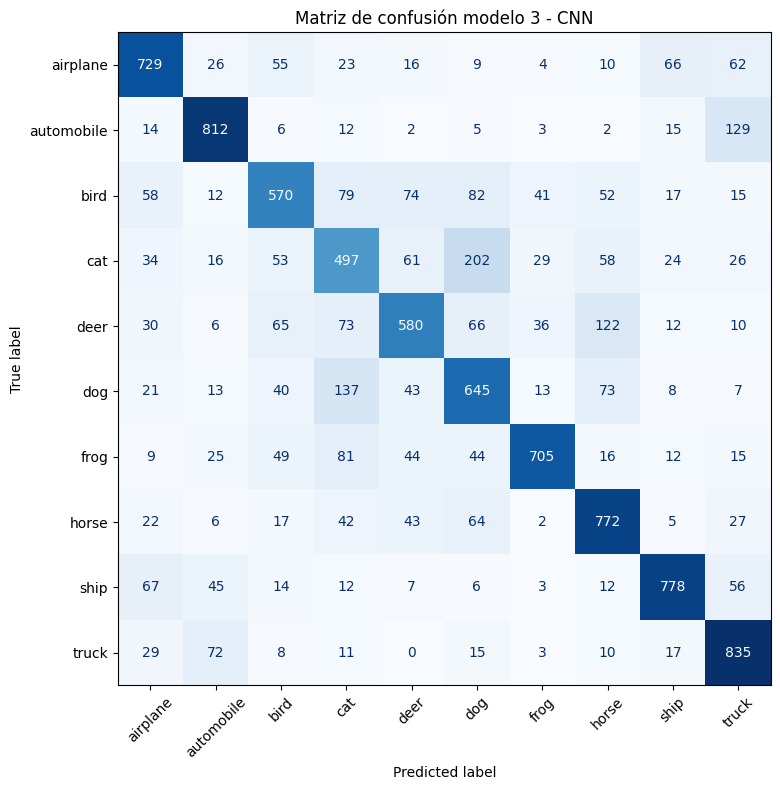

In [ ]:
# Predicciones del modelo 3 CNN
y_prob_cnn = modelo_3_CNN.predict(x_test, verbose=0)
y_pred_cnn = np.argmax(y_prob_cnn, axis=1)

# Convertir y_test de one-hot a etiquetas enteras
y_test_labels = np.argmax(y_test, axis=1)

# Matriz de confusión
cm_cnn = confusion_matrix(y_test_labels, y_pred_cnn)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_cnn,display_labels=target_names)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap="Blues", xticks_rotation=45, values_format='d', colorbar=False)
plt.title("Matriz de confusión modelo 3 - CNN")
plt.tight_layout()
plt.show()

### Redimensionar imágenes para MobileNetV2

Vamos a redimensionar `x_train` y `x_test` de (32, 32, 3) a (96, 96, 3) para que coincidan con el tamaño de entrada esperado por MobileNetV2.

In [ ]:
import tensorflow as tf

IMG_SIZE = 96

x_train_resized = tf.image.resize(x_train, (IMG_SIZE, IMG_SIZE))
x_test_resized = tf.image.resize(x_test, (IMG_SIZE, IMG_SIZE))

print(f"x_train_resized shape: {x_train_resized.shape}")
print(f"x_test_resized shape: {x_test_resized.shape}")

x_train_resized shape: (50000, 96, 96, 3)
x_test_resized shape: (10000, 96, 96, 3)


Modelo 4 usando partial fine tuning



In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential

modelo_base = MobileNetV2(input_shape = (IMG_SIZE, IMG_SIZE, 3),include_top=False, weights='imagenet')

# Congela las capas del modelo base
modelo_base.trainable = False

# Descongela las ultimas 5 capas del modelo base para hacer fine-tuning
for layer in modelo_base.layers[-5:]:
    layer.trainable = True

modelo_4 = Sequential([
    modelo_base,
    GlobalAveragePooling2D(),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

modelo_4.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

modelo_4.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_96             │ (None, 3, 3, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,270,794 (8.66 MB)

 Trainable params: 732,810 (2.80 MB)

 Non-trainable params: 1,537,984 (5.87 MB)

Modelo 5

In [ ]:
# Estrategia 2: Entrenar SOLO las capas añadidas
from tensorflow.keras.models import Sequential # Added this import

base_model_2 = MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights='imagenet')

# Congelar todas las capas
base_model_2.trainable = False

modelo_5 = Sequential([
    base_model_2,
    GlobalAveragePooling2D(),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

modelo_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

modelo_5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_96             │ (None, 3, 3, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,270,794 (8.66 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Entrenamiento modelo 4 (Fine-tuning parcial)

In [ ]:
history_modelo4 = modelo_4.fit(x_train_resized, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 0.7227 - loss: 0.8433 - val_accuracy: 0.7553 - val_loss: 1.1277
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.8113 - loss: 0.5376 - val_accuracy: 0.7805 - val_loss: 0.9328
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.8331 - loss: 0.4755 - val_accuracy: 0.8266 - val_loss: 0.5894
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.8546 - loss: 0.4115 - val_accuracy: 0.8146 - val_loss: 0.6325
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.8653 - loss: 0.3756 - val_accuracy: 0.7744 - val_loss: 0.9389
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.8787 - loss: 0.3353 - val_accuracy: 0.8193 - val_loss: 0.6166
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.8938 - loss: 0.2966 - val_accuracy: 0.8051 - val_loss: 0.7216
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.9021 -

Entrenamiento modelo 5 (Solo capas añadidas)

In [ ]:
history_modelo5 = modelo_5.fit(x_train_resized, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.6365 - loss: 1.0539 - val_accuracy: 0.7846 - val_loss: 0.6268
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.7675 - loss: 0.6629 - val_accuracy: 0.7901 - val_loss: 0.6136
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.7826 - loss: 0.6298 - val_accuracy: 0.7890 - val_loss: 0.6244
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.7844 - loss: 0.6197 - val_accuracy: 0.7944 - val_loss: 0.5967
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.7869 - loss: 0.6118 - val_accuracy: 0.7949 - val_loss: 0.5957
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.7945 - loss: 0.5878 - val_accuracy: 0.7924 - val_loss: 0.6055
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.7942 - loss: 0.5868 - val_accuracy: 0.7862 - val_loss: 0.6255
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.7903 -

### Evaluación Modelo 4

In [ ]:
loss_m4, acc_m4 = modelo_4.evaluate(x_test_resized, y_test, verbose=0)
train_loss_m4, train_acc_m4 = modelo_4.evaluate(x_train_resized, y_train, verbose=0)

print(f"Modelo 4 - Train Accuracy: {train_acc_m4:.4f} | Train Loss: {train_loss_m4:.4f}")
print(f"Modelo 4 - Test Accuracy: {acc_m4:.4f} | Test Loss: {loss_m4:.4f}")

Modelo 4 - Train Accuracy: 0.9140 | Train Loss: 0.2703
Modelo 4 - Test Accuracy: 0.8264 | Test Loss: 0.6585


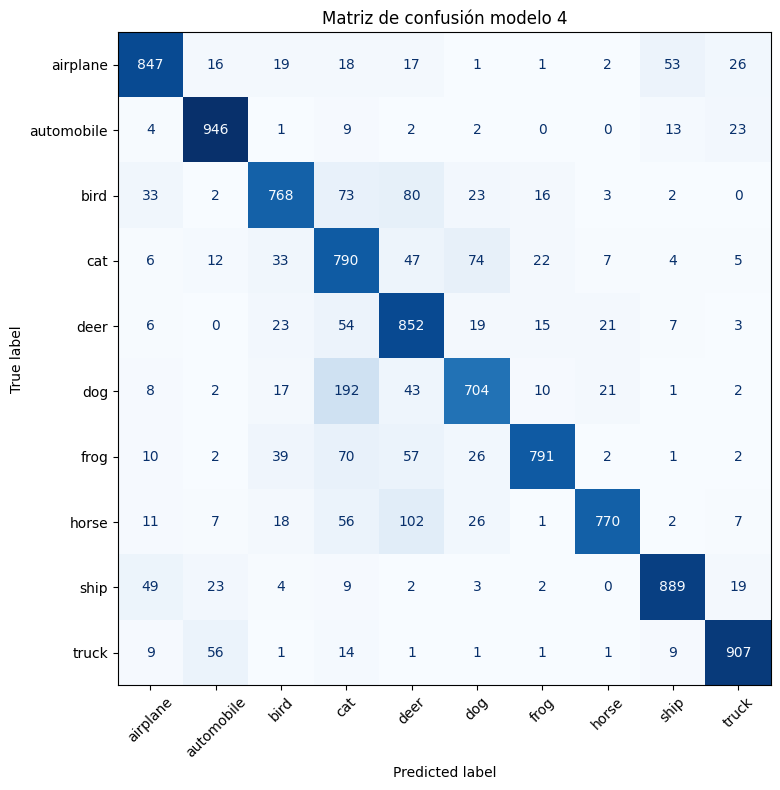

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

target_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

y_prob_m4 = modelo_4.predict(x_test_resized, verbose=0)
y_pred_m4 = np.argmax(y_prob_m4, axis=1)

y_test_labels = np.argmax(y_test, axis=1)

cm_m4 = confusion_matrix(y_test_labels, y_pred_m4)
disp_m4 = ConfusionMatrixDisplay(cm_m4, display_labels=target_names)
fig_m4, ax_m4 = plt.subplots(figsize=(8, 8))
disp_m4.plot(ax=ax_m4, cmap="Blues", xticks_rotation=45, values_format='d', colorbar=False)
plt.title("Matriz de confusión modelo 4")
plt.tight_layout()
plt.show()

### Evaluación Modelo 5

In [ ]:
loss_m5, acc_m5 = modelo_5.evaluate(x_test_resized, y_test, verbose=0)
train_loss_m5, train_acc_m5 = modelo_5.evaluate(x_train_resized, y_train, verbose=0)

print(f"Modelo 5 - Train Accuracy: {train_acc_m5:.4f} | Train Loss: {train_loss_m5:.4f}")
print(f"Modelo 5 - Test Accuracy: {acc_m5:.4f} | Test Loss: {loss_m5:.4f}")

Modelo 5 - Train Accuracy: 0.8154 | Train Loss: 0.5280
Modelo 5 - Test Accuracy: 0.7845 | Test Loss: 0.6301


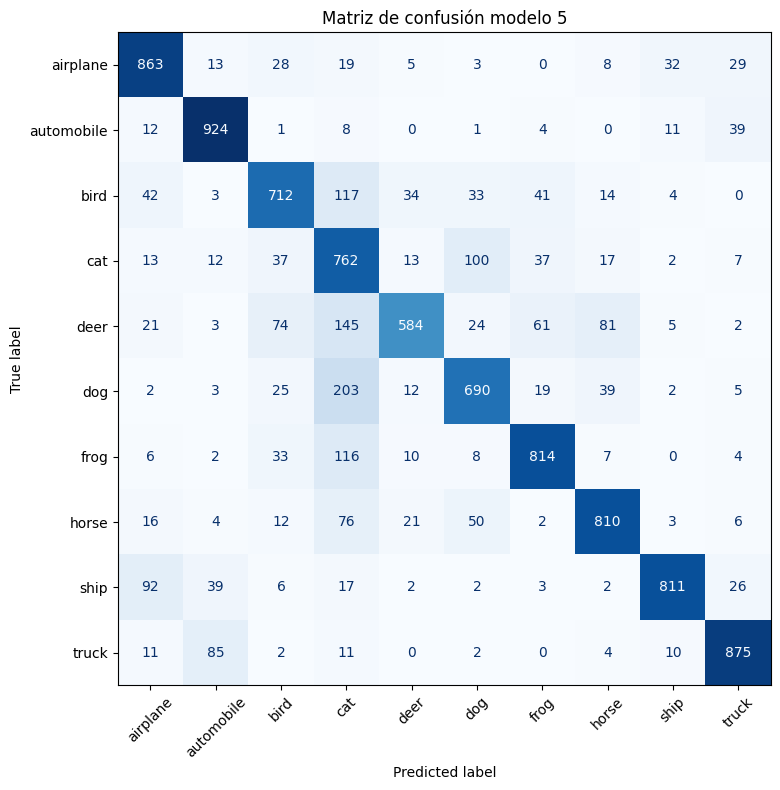

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

target_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

y_prob_m5 = modelo_5.predict(x_test_resized, verbose=0)
y_pred_m5 = np.argmax(y_prob_m5, axis=1)

y_test_labels = np.argmax(y_test, axis=1)

cm_m5 = confusion_matrix(y_test_labels, y_pred_m5)
disp_m5 = ConfusionMatrixDisplay(cm_m5, display_labels=target_names)
fig_m5, ax_m5 = plt.subplots(figsize=(8, 8))
disp_m5.plot(ax=ax_m5, cmap="Blues", xticks_rotation=45, values_format='d', colorbar=False)
plt.title("Matriz de confusión modelo 5")
plt.tight_layout()
plt.show()

In [ ]:
print("\n================ RESUMEN ================ ")
print(f"Modelo 1 Fully Connected — Accuracy: {acc_m1:.4f}")
print(f"Modelo 2 Fully Connected — Accuracy: {acc_m2:.4f}")
print(f"Modelo 3 CNN — Accuracy: {acc_m3:.4f}")
print(f"Modelo 4 fine tuning — Accuracy: {acc_m4:.4f}")
print(f"Modelo 5 capas añadidas — Accuracy: {acc_m5:.4f}")
print("========================================")


================ RESUMEN ================ 
Modelo 1 Fully Connected — Accuracy: 0.3281
Modelo 2 Fully Connected — Accuracy: 0.4747
Modelo 3 CNN — Accuracy: 0.6923
Modelo 4 fine tuning — Accuracy: 0.8264
Modelo 5 capas añadidas — Accuracy: 0.7845


### Conclusión de los Modelos

Tras evaluar los cinco modelos desarrollados para la clasificación de imágenes del dataset CIFAR-10, podemos observar las siguientes precisiones (Accuracy) en el conjunto de prueba (Test Set):

*   **Modelo 1 (Fully Connected - Sigmoid)**: Accuracy: 0.3281
*   **Modelo 2 (Fully Connected - ReLU)**: Accuracy: 0.4747
*   **Modelo 3 (CNN)**: Accuracy: 0.6923
*   **Modelo 4 (MobileNetV2 - Fine-tuning parcial)**: Accuracy: 0.8264
*   **Modelo 5 (MobileNetV2 - Solo capas añadidas)**: Accuracy: 0.7845

Como se puede apreciar, los modelos más simples con capas densas (Modelo 1 y Modelo 2) obtuvieron las peores precisiones, lo que era esperado dada la complejidad de las imágenes de CIFAR-10. La introducción de una arquitectura convolucional (Modelo 3 CNN) mejoró significativamente el rendimiento, demostrando la superioridad de las CNN para tareas de visión por computadora.

Sin embargo, el mejor rendimiento se logró con la aplicación de la transferencia de aprendizaje utilizando la arquitectura MobileNetV2.

*   El **Modelo 4**, que aplicó un fine-tuning parcial descongelando las últimas capas del modelo base, obtuvo la precisión más alta, demostrando que ajustar las últimas capas pre-entrenadas a nuestro dataset específico es muy efectivo.
*   El **Modelo 5**, que solo entrenó las capas adicionales (GlobalAveragePooling2D, Dropout, Dense) manteniendo congelado todo el modelo base de MobileNetV2, también obtuvo una excelente precisión, aunque ligeramente inferior al Modelo 4. Esto sugiere que las características extraídas por MobileNetV2 son muy relevantes, incluso sin ajustar sus capas internas.

En resumen, el uso de arquitecturas pre-entrenadas mediante transferencia de aprendizaje (especialmente con fine-tuning parcial) es la estrategia más efectiva para este tipo de problema de clasificación de imágenes, superando ampliamente a los modelos creados desde cero.